In [1]:
import torch
import numpy as np
from ml import PINN
from data_loader import BioSensorsDataset
from torch.utils.data import DataLoader
import math


In [2]:

dataset = BioSensorsDataset("Data/data_in.csv","Data/new_data.csv")
generator1 = torch.Generator().manual_seed(42)

train_frac = math.floor(0.7*len(dataset))
test_frac = len(dataset) - train_frac

dataset_train, dataset_test = torch.utils.data.random_split(dataset, [train_frac, test_frac], generator=generator1)

data = DataLoader(dataset_train, batch_size=64, shuffle=True)
data1 = DataLoader(dataset_test, batch_size=20, shuffle=True)


net = PINN(2)

optim = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)
loss = torch.nn.MSELoss()



In [3]:

loss_list = []
loss_list1 = []
for l in range(5000):
    net.train()
    ls = 0
    for i,j in enumerate(data):
        optim.zero_grad()
        res = net(j[0])
        output = loss(res, j[1])        
        output.backward()
        optim.step()
        ls+=output.item()
    loss_list.append(ls/len(data))
    ls=0
    net.eval()
    for i,j in enumerate(data1):
        res = net(j[0])
        output = loss(res, j[1])
        ls+=output.item()
    loss_list1.append(ls/len(data1))

    print(l,min(loss_list), min(loss_list1))

0 25.183437983194988 24.290270566940308
1 24.753673553466797 23.31185030937195
2 23.13234011332194 22.41362953186035
3 23.062698046366375 22.042386293411255
4 21.67983341217041 20.57166028022766
5 19.69152371088664 18.143588662147522
6 17.01597261428833 14.33464515209198
7 14.74174451828003 11.695028305053711
8 12.199636777242025 11.08039677143097
9 12.199636777242025 10.042245507240295
10 11.323349157969156 9.803725600242615
11 11.194618542989096 9.803725600242615
12 11.194618542989096 9.803725600242615
13 10.93536376953125 9.803725600242615
14 10.93536376953125 9.803725600242615
15 10.4177037080129 9.381770372390747
16 10.389513810475668 9.381770372390747
17 10.179211457570394 9.295910060405731
18 10.179211457570394 9.295910060405731
19 9.858129262924194 9.295910060405731
20 9.858129262924194 8.845410883426666
21 9.858129262924194 8.845410883426666
22 9.743548313776651 8.567118048667908
23 9.56745719909668 7.981646835803986
24 9.56745719909668 7.981646835803986
25 9.233696937561035 7

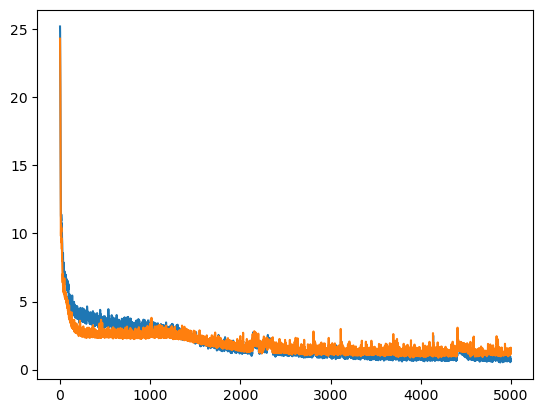

In [4]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.plot(loss_list1)

plt.show()

In [5]:
net.eval()
ls = 0
for i,j in enumerate(data1):
    res = net(j[0])
    output = loss(res, j[1])
    print(res)
    print(j[1])
    print("__________")
    ls+=output.item()
print(ls/len(data1))

    
    

tensor([[ 9.4990e+00,  5.4634e-02,  2.9426e-02, -1.7748e-03, -1.4594e-03,
          2.6082e-02,  3.0105e-02],
        [ 9.3207e+00,  1.5044e-01,  1.8200e-01,  1.3372e-02,  1.6959e-02,
          1.3669e-02,  1.6209e-02],
        [ 3.5404e+00,  6.8213e+00,  9.9188e+00,  7.6660e+00,  8.8523e+00,
          5.5159e-01,  6.1297e-01],
        [ 8.8870e+00,  7.8499e+00,  8.5576e+00,  5.8353e-02,  7.0761e-02,
          1.1027e-02,  1.2665e-02],
        [ 3.4947e+00,  7.7673e+00,  1.1034e+01,  6.2515e+00,  7.1327e+00,
          1.9133e-01,  2.0955e-01],
        [ 9.2562e+00,  2.5601e-01,  3.2789e-01,  2.9015e-02,  3.5385e-02,
          2.9863e-03,  4.2813e-03],
        [ 4.4191e+00,  6.4119e+00,  9.1066e+00,  1.2486e-01,  1.4307e-01,
          2.4986e-02,  2.4473e-02],
        [ 9.5205e+00,  3.9522e-02,  8.0889e-03, -3.8383e-03, -3.9048e-03,
          2.7052e-02,  3.1192e-02],
        [ 9.6543e+00,  2.5970e+00,  2.8477e+00, -4.8105e-02, -4.9265e-02,
         -1.7621e-01, -1.9678e-01],
        [ 